In [52]:
from voting_fns import plurality, iterative_plurality, RCR_iterative_plurality
import random
import matplotlib.pyplot as plt
import numpy as np
import os

Iterative Plurality vs Randomized Candidate Removal Iterative Plurality

In [2]:
num_voters = [10, 20, 50, 100, 200, 500, 1000]
num_candidates = {10:[3,5,7,10],
                  20:[5,10,15,20],
                  50:[10,20,30,40,50],
                  100:[10,25,50,75,90,100],
                  200:[25,50,100,150,175,200],
                  500:[100,200,300,400,500],
                  1000:[125,250,500,750,1000]}

num_simulations = 100

plurality_results = []
RCR_results = []

same_result = []

for n in num_voters:
    for m in num_candidates[n]:
        if m > n:
            continue

        print((n,m))

        max_iter_p = 0
        sum_iter_p = 0

        max_iter_rcr = 0
        sum_iter_rcr = 0

        same = 0
        for i in range(num_simulations):
            if i%25 == 0:
                print("Simulation # ", i)

            
            L = []
            for voter in range(n):
                preference_profile = [*range(m)]
                random.shuffle(preference_profile)
                L.append(preference_profile)
            
            initial_state = [random.randint(0,m-1) for preference_profile in L]

            _, _, tc_p, num_iter_p = iterative_plurality(L, m, from_truth=False, initial_state=initial_state.copy())
            _, _, tc_rcr, num_iter_rcr = RCR_iterative_plurality(L, m, from_truth=False, initial_state=initial_state)

            if tc_p == tc_rcr:
                same += 1


            sum_iter_p += num_iter_p
            sum_iter_rcr += num_iter_rcr

            if num_iter_p > max_iter_p:
                max_iter_p = num_iter_p

            if num_iter_rcr > max_iter_rcr:
                max_iter_rcr = num_iter_rcr
        
        plurality_results.append([n, m, sum_iter_p/num_simulations, max_iter_p])
        RCR_results.append([n, m, sum_iter_rcr/num_simulations, max_iter_rcr])

        same_result.append([n, m, same/num_simulations])



(10, 3)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(10, 5)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(10, 7)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(10, 10)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(20, 5)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(20, 10)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(20, 15)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(20, 20)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(50, 10)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(50, 20)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(50, 30)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(50, 40)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(50, 50)
Simulation #  0
Simulation #  25
Simulation #  50
Simulation #  75
(100, 10)
Simula

KeyboardInterrupt: 

In [3]:
print(plurality_results)
plurality_results = np.asarray(plurality_results)

[[10, 3, 22.4, 60], [10, 5, 26.9, 60], [10, 7, 30.9, 60], [10, 10, 29.0, 60], [20, 5, 59.0, 140], [20, 10, 73.2, 140], [20, 15, 79.0, 140], [20, 20, 70.8, 180], [50, 10, 211.5, 600], [50, 20, 224.0, 700], [50, 30, 266.0, 600], [50, 40, 271.0, 600], [50, 50, 249.0, 650], [100, 10, 449.0, 1700], [100, 25, 502.0, 1600], [100, 50, 592.0, 1800], [100, 75, 522.0, 1500], [100, 90, 559.0, 1900], [100, 100, 573.0, 1800], [200, 25, 1272.0, 4200], [200, 50, 1186.0, 4600], [200, 100, 1532.0, 6200], [200, 150, 1288.0, 4800], [200, 175, 1264.0, 4600], [200, 200, 1490.0, 4600], [500, 100, 3550.0, 19500], [500, 200, 5075.0, 21000], [500, 300, 4220.0, 18000]]


In [4]:
print(RCR_results)
RCR_results = np.asarray(RCR_results)

[[10, 3, 16.0, 20], [10, 5, 27.2, 40], [10, 7, 31.4, 60], [10, 10, 29.0, 60], [20, 5, 54.8, 80], [20, 10, 74.8, 160], [20, 15, 79.0, 140], [20, 20, 70.8, 180], [50, 10, 243.0, 450], [50, 20, 224.0, 700], [50, 30, 266.0, 600], [50, 40, 271.0, 600], [50, 50, 249.0, 650], [100, 10, 588.0, 900], [100, 25, 515.0, 1600], [100, 50, 592.0, 1800], [100, 75, 522.0, 1500], [100, 90, 559.0, 1900], [100, 100, 573.0, 1800], [200, 25, 1714.0, 4800], [200, 50, 1212.0, 4600], [200, 100, 1532.0, 6200], [200, 150, 1288.0, 4800], [200, 175, 1264.0, 4600], [200, 200, 1490.0, 4600], [500, 100, 3555.0, 19500], [500, 200, 5075.0, 21000], [500, 300, 4220.0, 18000]]


In [5]:
print(same_result)
same_result = np.asarray(same_result)

[[10, 3, 0.79], [10, 5, 0.73], [10, 7, 0.95], [10, 10, 1.0], [20, 5, 0.68], [20, 10, 0.9], [20, 15, 1.0], [20, 20, 1.0], [50, 10, 0.57], [50, 20, 0.99], [50, 30, 1.0], [50, 40, 1.0], [50, 50, 1.0], [100, 10, 0.46], [100, 25, 0.98], [100, 50, 1.0], [100, 75, 1.0], [100, 90, 1.0], [100, 100, 1.0], [200, 25, 0.67], [200, 50, 0.98], [200, 100, 1.0], [200, 150, 1.0], [200, 175, 1.0], [200, 200, 1.0], [500, 100, 1.0], [500, 200, 1.0], [500, 300, 1.0]]


In [53]:
n_voters = num_voters.copy()
n_voters.remove(500)
n_voters.remove(1000)

figsize = (24,8)
figures_folder = "figures"

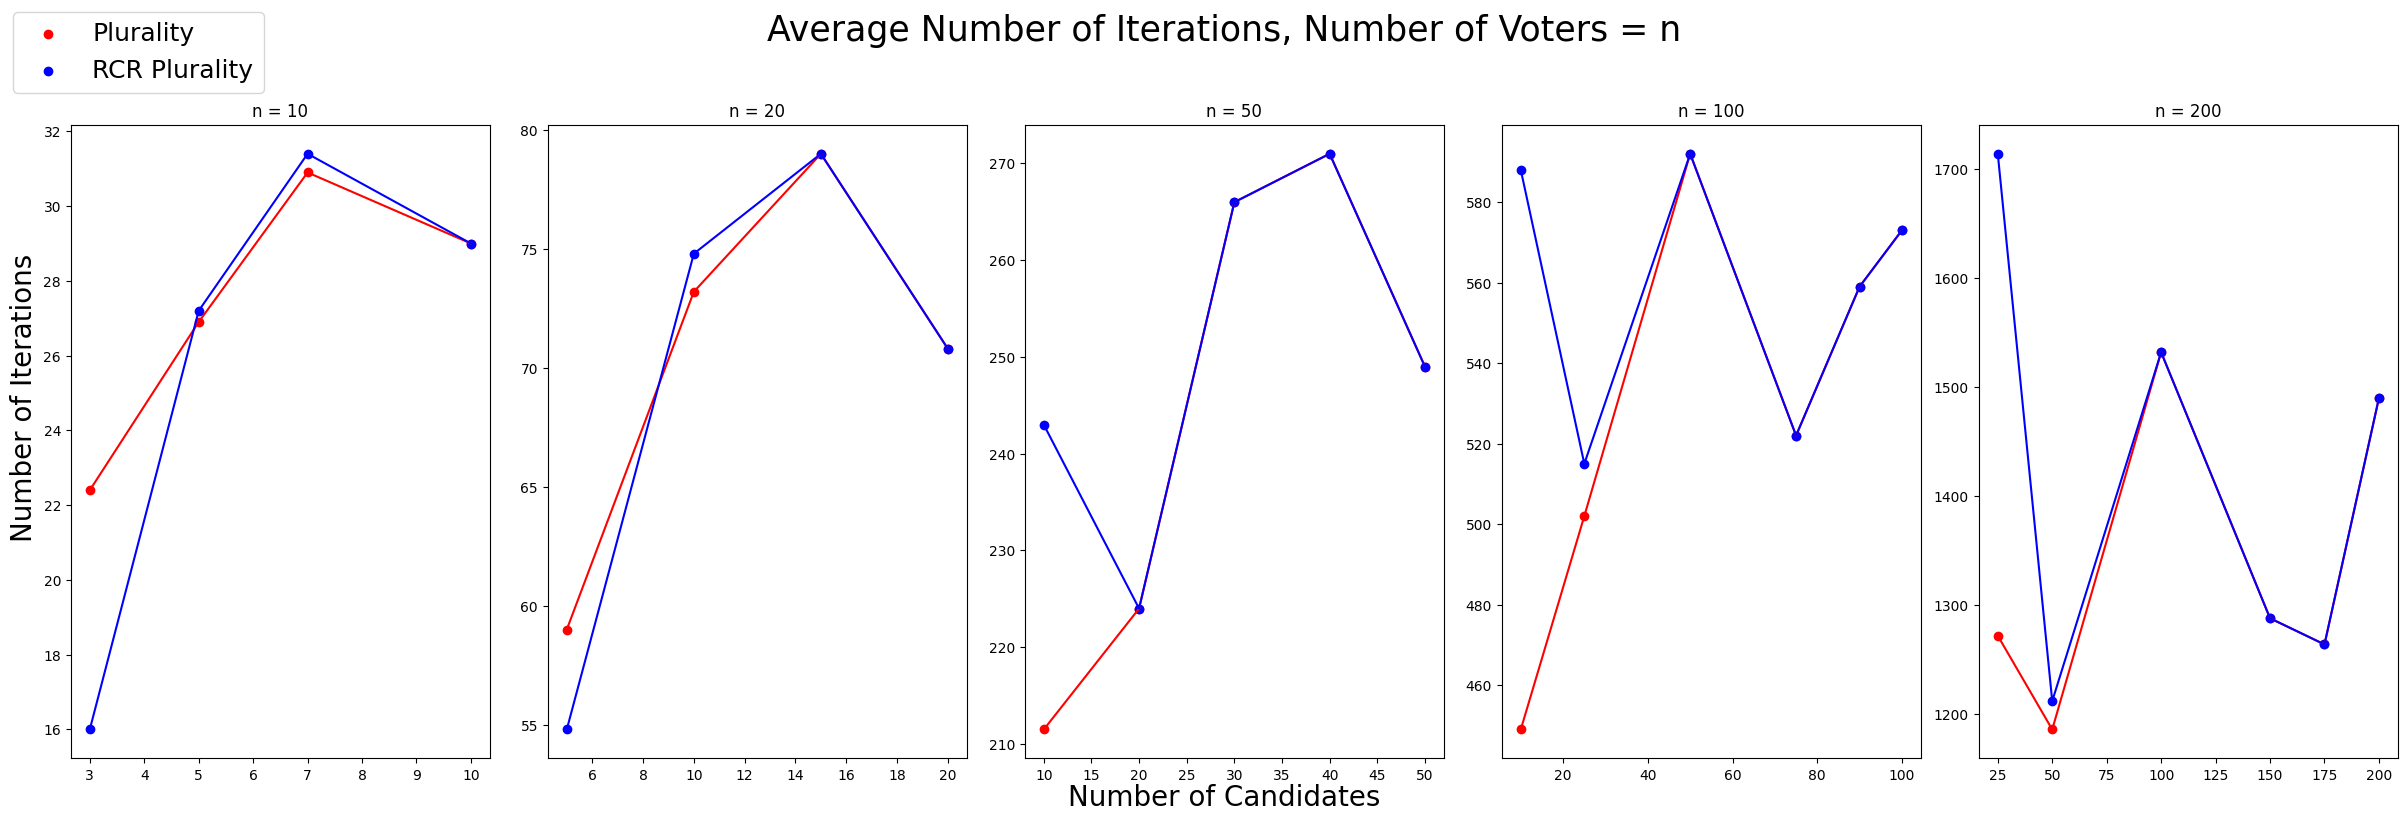

In [80]:
f, axs = plt.subplots(1, len(n_voters), figsize=figsize)
f.tight_layout()
f.suptitle("Average Number of Iterations, Number of Voters = n", fontsize=25)
f.subplots_adjust(top=.84)

f.text(0.5, 0, 'Number of Candidates', ha='center', va='center', fontsize=20)
f.text(0, 0.5, 'Number of Iterations', ha='center', va='center', rotation='vertical', fontsize=20)


for index,n in enumerate(n_voters):
    p_data = plurality_results[plurality_results[:,0] == n, 2]
    rcr_data = RCR_results[RCR_results[:,0] == n, 2]

    axs[index].title.set_text(f"n = {n}")
    

    axs[index].scatter(num_candidates[n], p_data, color='r', label="Plurality")
    axs[index].plot(num_candidates[n], p_data, color='r')

    axs[index].scatter(num_candidates[n], rcr_data, color='b', label="RCR Plurality")
    axs[index].plot(num_candidates[n], rcr_data, color='b')

handles, labels = axs[-1].get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', fontsize=18)

f.savefig(os.path.join(figures_folder, "AverageIterations.png"), bbox_inches="tight", pad_inches=0.25)


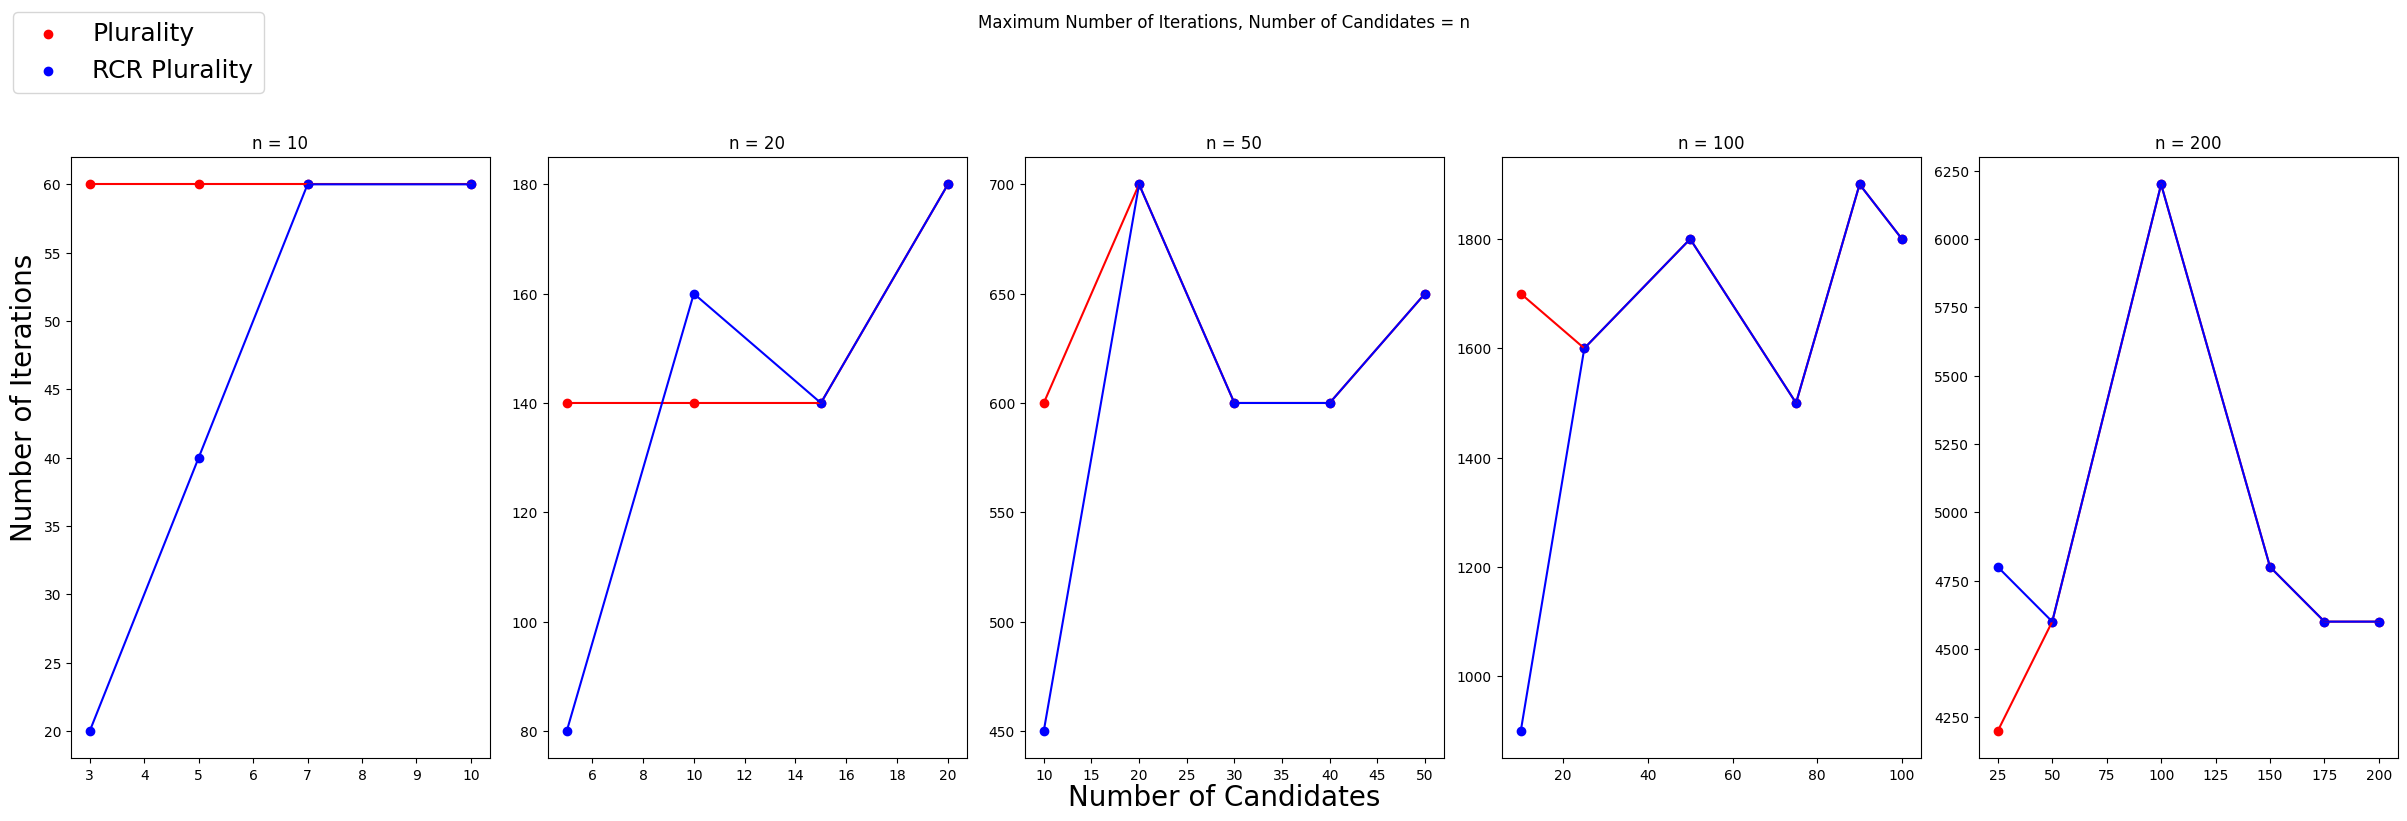

In [81]:

f, axs = plt.subplots(1, len(n_voters), figsize=figsize)
f.tight_layout()

f.suptitle("Maximum Number of Iterations, Number of Candidates = n")
f.subplots_adjust(top=0.8)

f.text(0.5, 0, 'Number of Candidates', ha='center', va='center', fontsize=20)
f.text(0, 0.5, 'Number of Iterations', ha='center', va='center', rotation='vertical', fontsize=20)

for index,n in enumerate(n_voters):
    p_data = plurality_results[plurality_results[:,0] == n, 3]
    rcr_data = RCR_results[RCR_results[:,0] == n, 3]

    axs[index].title.set_text(f"n = {n}")

    axs[index].scatter(num_candidates[n], p_data, color='r', label="Plurality")
    axs[index].plot(num_candidates[n], p_data, color='r')

    axs[index].scatter(num_candidates[n], rcr_data, color='b', label="RCR Plurality")
    axs[index].plot(num_candidates[n], rcr_data, color='b')

handles, labels = axs[-1].get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', fontsize=18)
f.savefig(os.path.join(figures_folder, "MaximumIterations.png"), bbox_inches="tight", pad_inches=0.25)

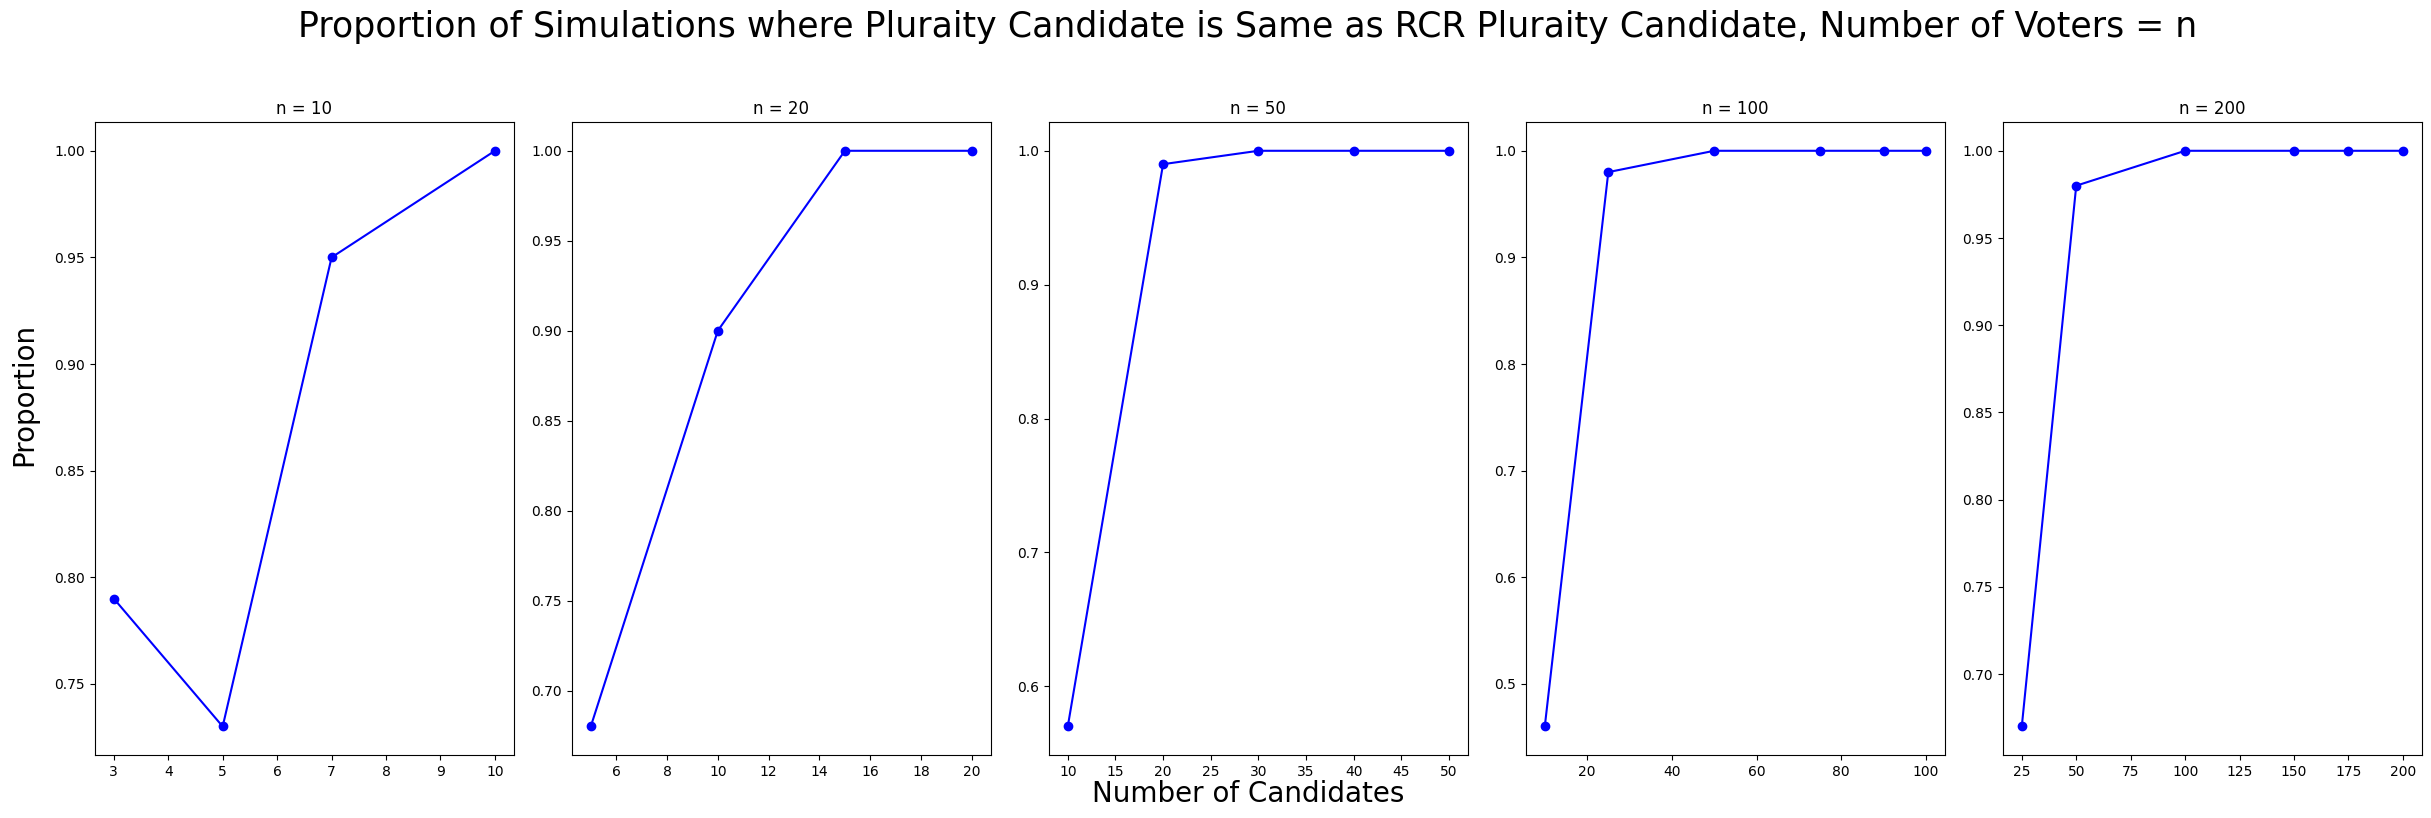

In [82]:
f, axs = plt.subplots(1, len(n_voters), figsize=figsize)
f.tight_layout()
f.suptitle("Proportion of Simulations where Pluraity Candidate is Same as RCR Pluraity Candidate, Number of Voters = n", fontsize=25)
f.subplots_adjust(top=.84)

f.text(0.5, 0, 'Number of Candidates', ha='center', va='center', fontsize=20)
f.text(-.01, 0.5, 'Proportion', ha='center', va='center', rotation='vertical', fontsize=20)


for index,n in enumerate(n_voters):
    same_data = same_result[same_result[:,0] == n, 2]

    axs[index].title.set_text(f"n = {n}")
    

    axs[index].scatter(num_candidates[n], same_data, color='b')
    axs[index].plot(num_candidates[n], same_data, color='b')


f.savefig(os.path.join(figures_folder, "SameProportion.png"), bbox_inches="tight", pad_inches=0.25)